In [1]:
import os
import sys

# Add the project root to sys.path
cwd = os.getcwd()
project_root = os.path.dirname(cwd)
sys.path.append(project_root)

from scripts.data_analysis_utils import DataAnalysis

In [2]:
# define the data path
data_path = '../data/benin-malanville.csv'

In [3]:
# Create an instance of the DataAnalysis class
data_analyzer = DataAnalysis(data_path)

In [4]:
# Load the data
data_analyzer.load_data()

Dataset loaded successfully!


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


In [5]:
# Get summary statistics
summary_stats = data_analyzer.summary_statistics()
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [6]:
# Perform data quality check
data_quality_results = data_analyzer.data_quality_check(['GHI', 'DNI', 'DHI'])
print(data_quality_results)

{'GHI': {'missing_values': 0, 'negative_values': 258847, 'outliers': 89}, 'DNI': {'missing_values': 0, 'negative_values': 275987, 'outliers': 0}, 'DHI': {'missing_values': 0, 'negative_values': 259182, 'outliers': 3738}}


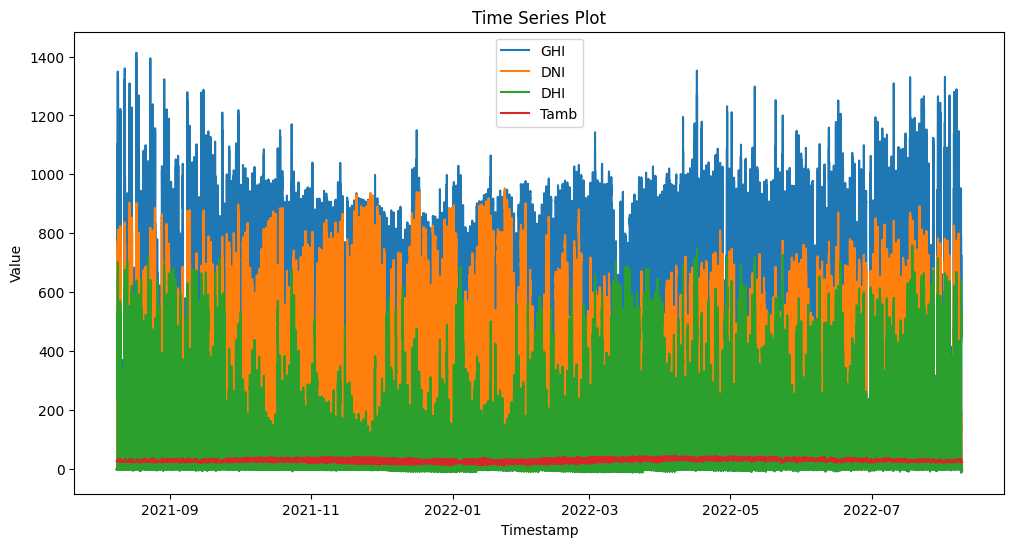

In [7]:
# Time series analysis for temperature and irradiance columns
data_analyzer.time_series_analysis(['GHI', 'DNI', 'DHI', 'Tamb'])

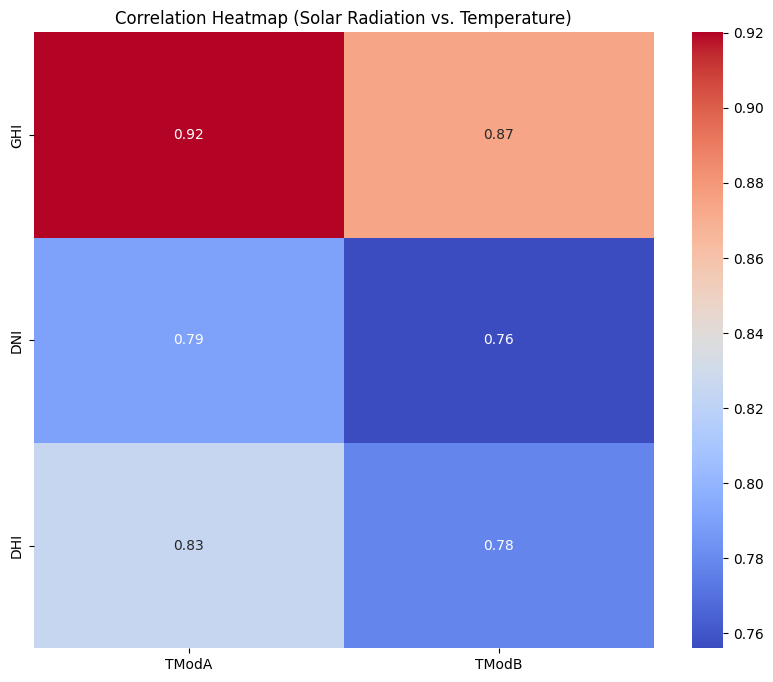

In [8]:
# Perform correlation analysis
data_analyzer.correlation_analysis("Solar Radiation", ['GHI', 'DNI', 'DHI'], "Temperature", ['TModA', 'TModB'])


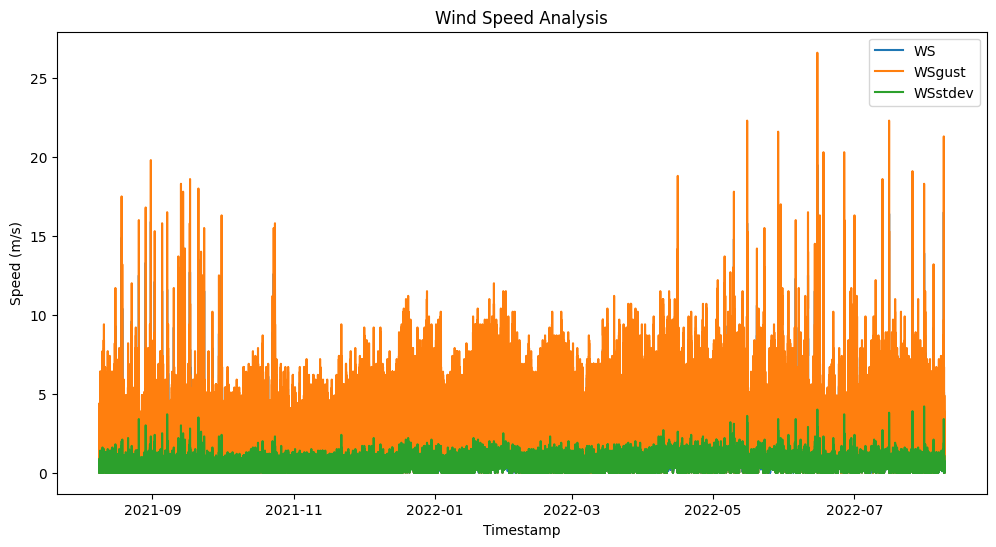

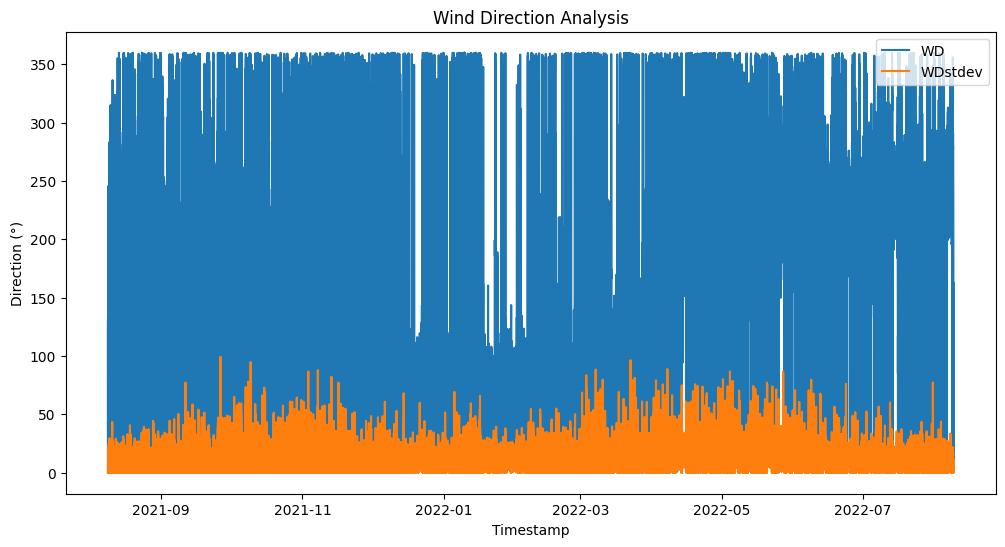

In [9]:
# Wind analysis
wind_speed_cols = ['WS', 'WSgust', 'WSstdev']
wind_direction_cols = ['WD', 'WDstdev']
data_analyzer.wind_analysis(wind_speed_cols, wind_direction_cols)

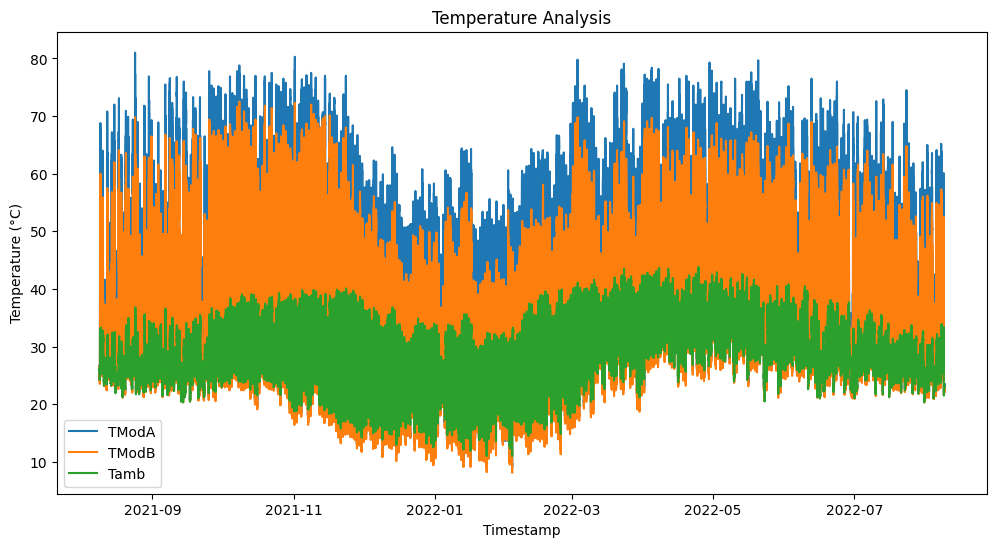

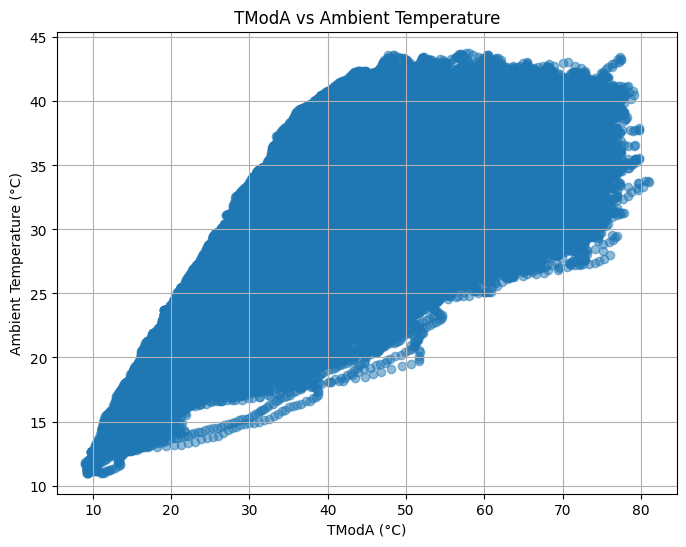

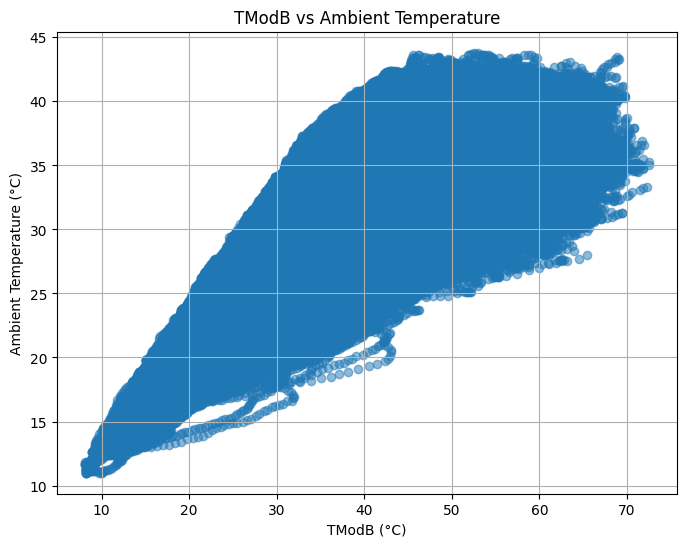

In [10]:
# Temperature analysis for module and ambient temperature columns
temperature_cols = ['TModA', 'TModB', 'Tamb']
data_analyzer.temperature_analysis(temperature_cols)

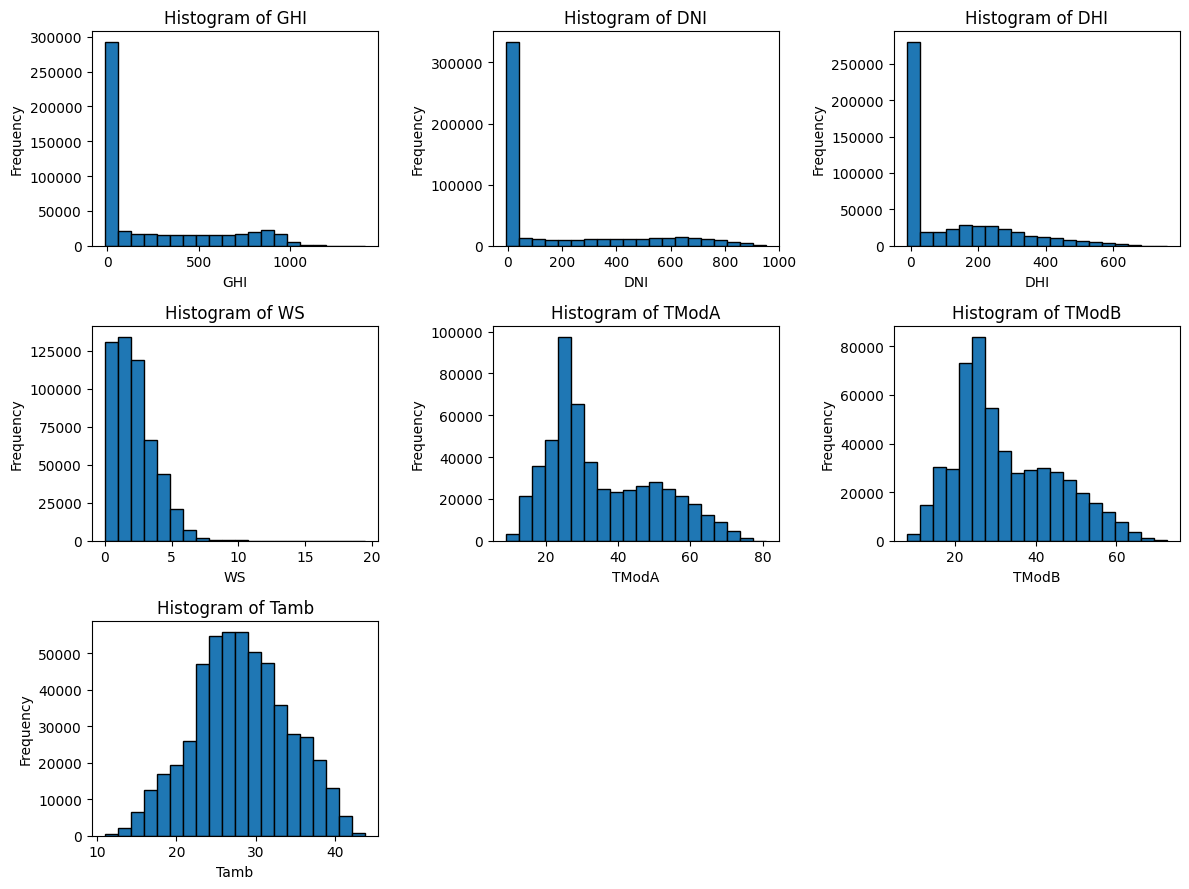

In [11]:
# Create histograms for GHI, DNI, DHI, TModA, WS
data_analyzer.histograms(['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb'])

Box Plots for Solar Radiation:


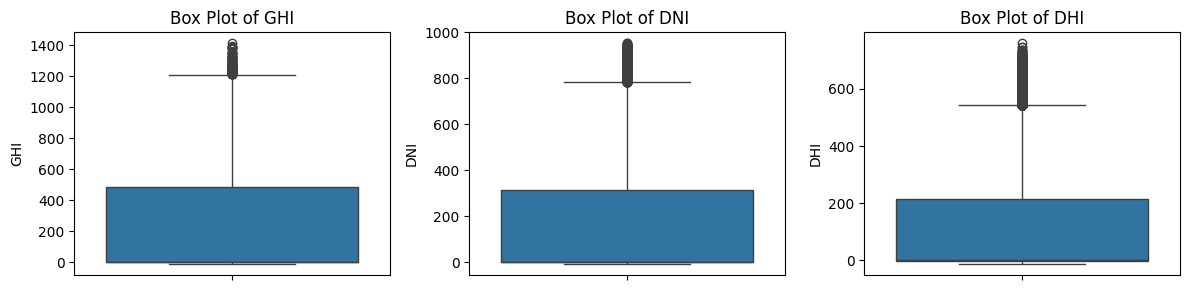

Box Plots for Temperature:


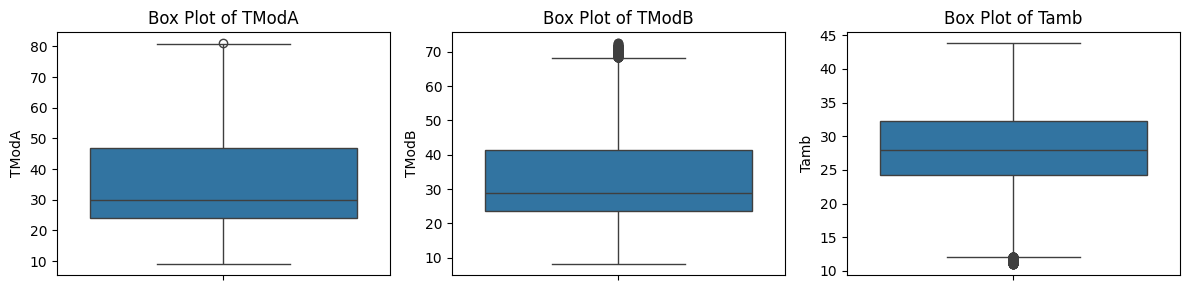

In [12]:
# Define lists containing solar radiation and temperature columns
solar_radiation_cols = ['GHI', 'DNI', 'DHI']
temperature_cols = ['TModA', 'TModB', 'Tamb']

# Create box plots for solar radiation data
print("Box Plots for Solar Radiation:")
data_analyzer.box_plots(solar_radiation_cols)

# Create box plots for temperature data
print("Box Plots for Temperature:")
data_analyzer.box_plots(temperature_cols)

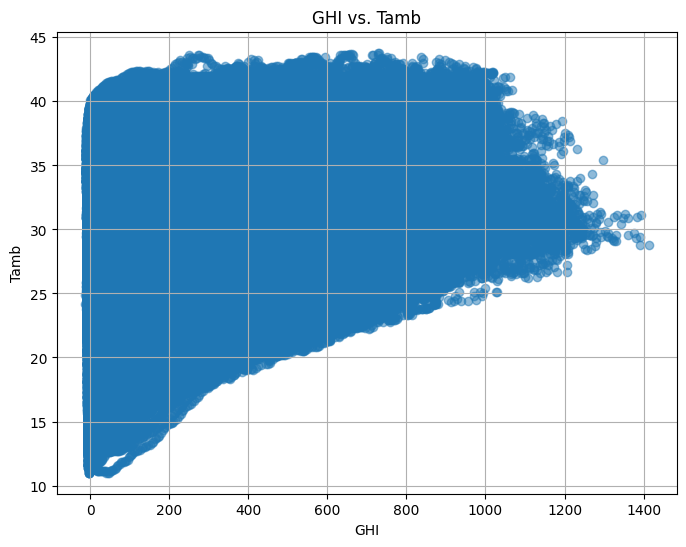

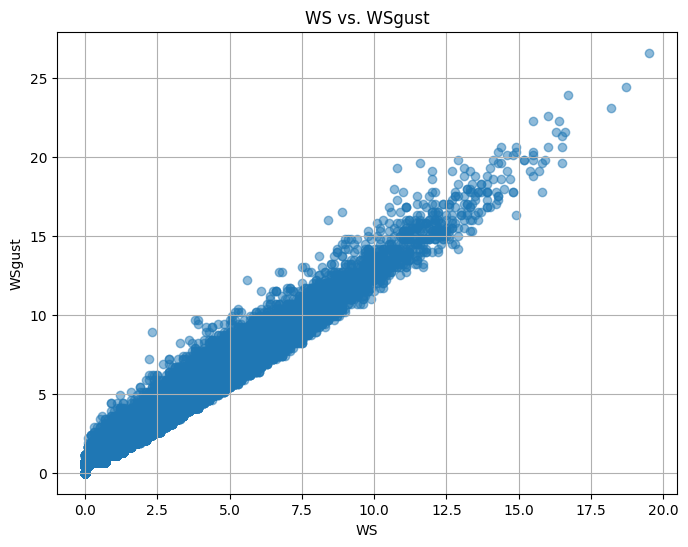

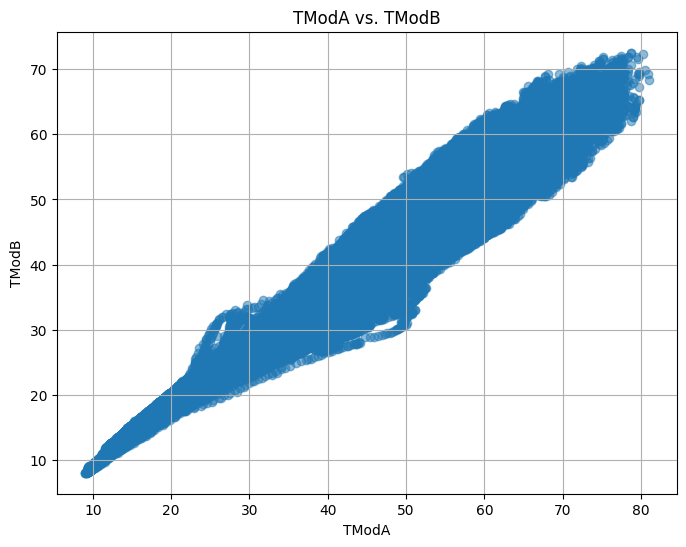

In [13]:
# Scatter plots (
scatter_plot_pairs = [
    ('GHI', 'Tamb'),  # GHI vs. Ambient Temperature
    ('WS', 'WSgust'),   # Wind Speed vs. Wind Gust
    ('TModA', 'TModB'),  # Module Temperature A vs. Module Temperature B
]

# Create scatter plots for each pair of variables
for x_col, y_col in scatter_plot_pairs:
    data_analyzer.scatter_plot(x_col, y_col)

In [14]:
# Data Cleaning
cleaned_data = data_analyzer.data_cleaning(drop_comments=True, handle_missing_values='dropna', columns_to_clean=['GHI', 'DNI', 'DHI'])
print(cleaned_data)

                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-08-09 00:01:00  1.2  0.2  1.1   0.0   0.0  26.2  93.4  0.0   
1      2021-08-09 00:02:00  1.1  0.2  1.1   0.0   0.0  26.2  93.6  0.0   
2      2021-08-09 00:03:00  1.1  0.2  1.1   0.0   0.0  26.2  93.7  0.3   
3      2021-08-09 00:04:00  1.1  0.1  1.0   0.0   0.0  26.2  93.3  0.2   
4      2021-08-09 00:05:00  1.0  0.1  1.0   0.0   0.0  26.2  93.3  0.1   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-08-08 23:56:00  5.5  0.1  5.9   0.0   0.0  23.1  98.3  0.3   
525596 2022-08-08 23:57:00  5.5  0.1  5.8   0.0   0.0  23.1  98.3  0.2   
525597 2022-08-08 23:58:00  5.5  0.1  5.8   0.0   0.0  23.1  98.4  0.6   
525598 2022-08-08 23:59:00  5.5  0.1  5.8   0.0   0.0  23.1  98.3  0.9   
525599 2022-08-09 00:00:00  5.5  0.1  5.7   0.0   0.0  23.1  98.3  1.2   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0          0.4      0.1  122.1 

In [15]:
# Get summary statistics after data cleaning
summary_stats = data_analyzer.summary_statistics(cleaned_data)
print(summary_stats)

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     243.358189     167.696217   
min              2021-08-09 00:01:00       0.000000       0.000000   
25%              2021-11-08 06:00:45       2.000000       0.400000   
50%              2022-02-07 12:00:30       7.100000       0.800000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     329.079922     261.384832   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      118.627106     236.589496     228.883576      28.179683   
min         0.000000       0.000000       0.000000      11.000000   
25%         2.100000       0.000000       0.000000      24.200000   
50%         8.600000    

In [16]:
# Perform data quality check on cleaned data
data_quality_results = data_analyzer.data_quality_check(['GHI', 'DNI', 'DHI'], cleaned_data)
print(data_quality_results)

{'GHI': {'missing_values': 0, 'negative_values': 0, 'outliers': 97}, 'DNI': {'missing_values': 0, 'negative_values': 0, 'outliers': 2}, 'DHI': {'missing_values': 0, 'negative_values': 0, 'outliers': 4040}}


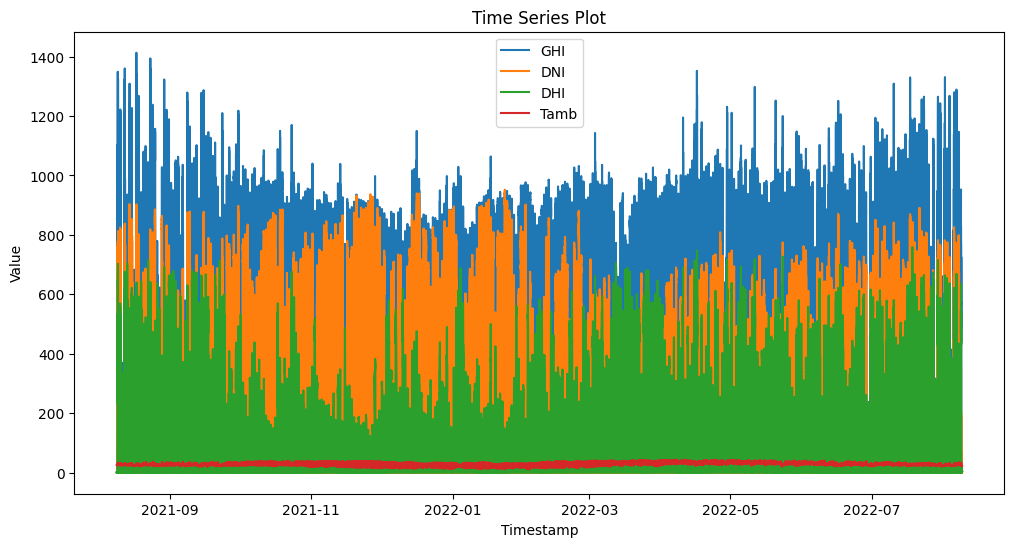

In [17]:
# Time series analysis for temperature and irradiance columns using cleaned data
data_analyzer.time_series_analysis(['GHI', 'DNI', 'DHI', 'Tamb'], cleaned_data)

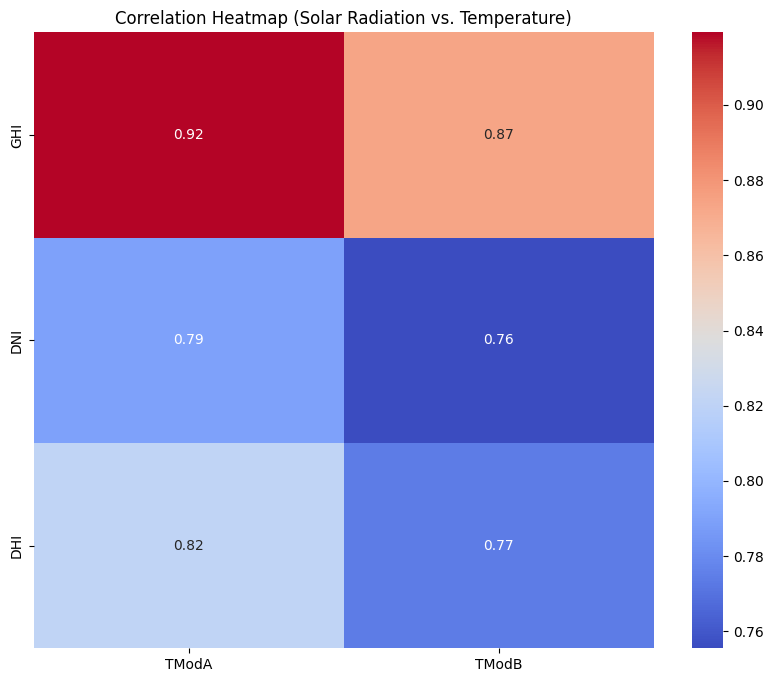

In [18]:
# Perform correlation analysis using cleaned data
data_analyzer.correlation_analysis("Solar Radiation", ['GHI', 'DNI', 'DHI'], "Temperature", ['TModA', 'TModB'], cleaned_data)

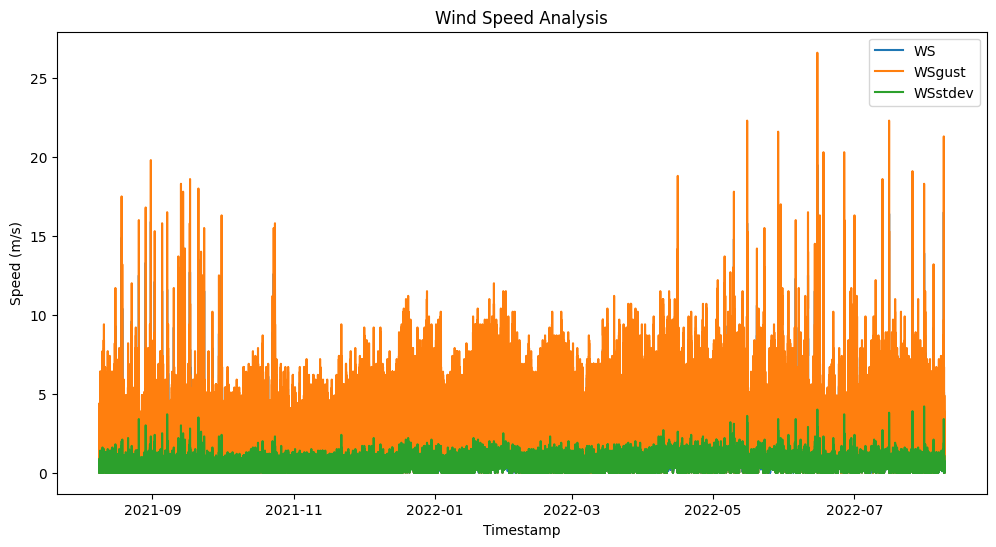

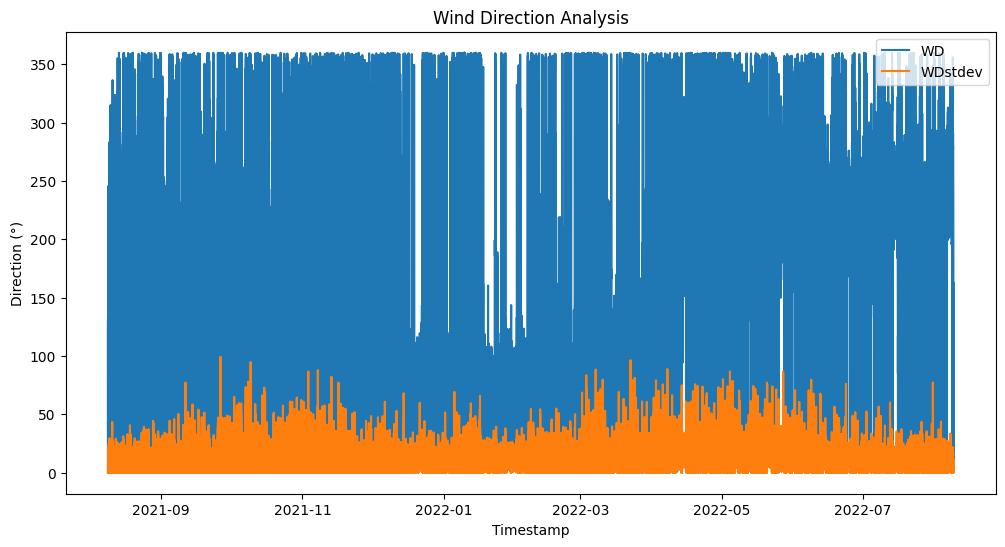

In [19]:
# Wind analysis using cleaned data
data_analyzer.wind_analysis(wind_speed_cols, wind_direction_cols, cleaned_data)

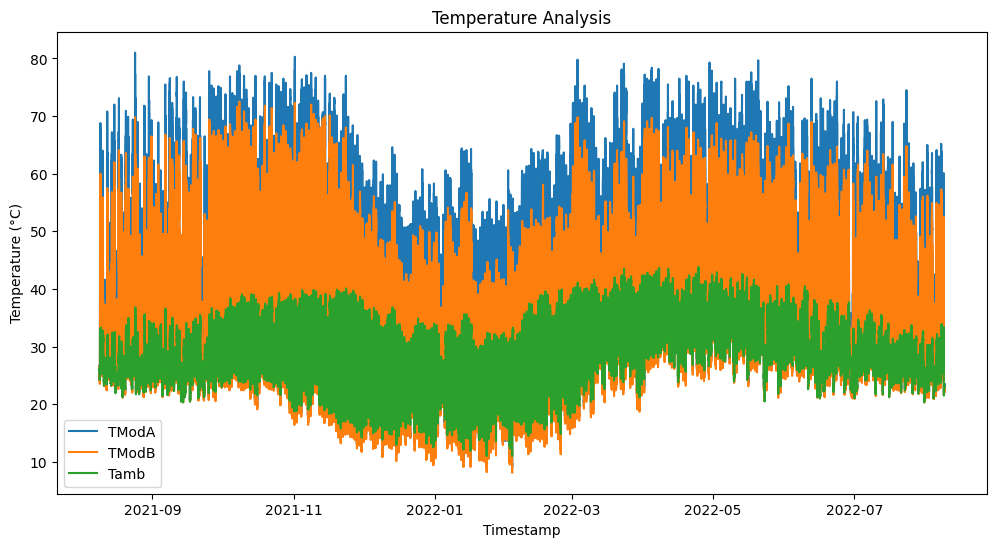

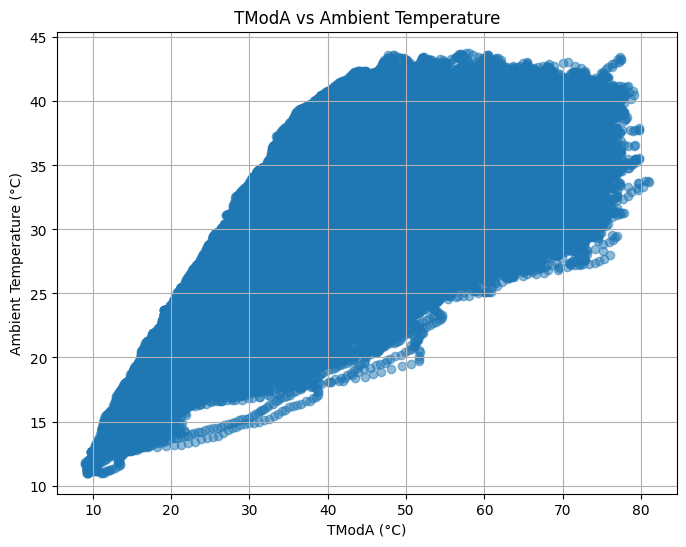

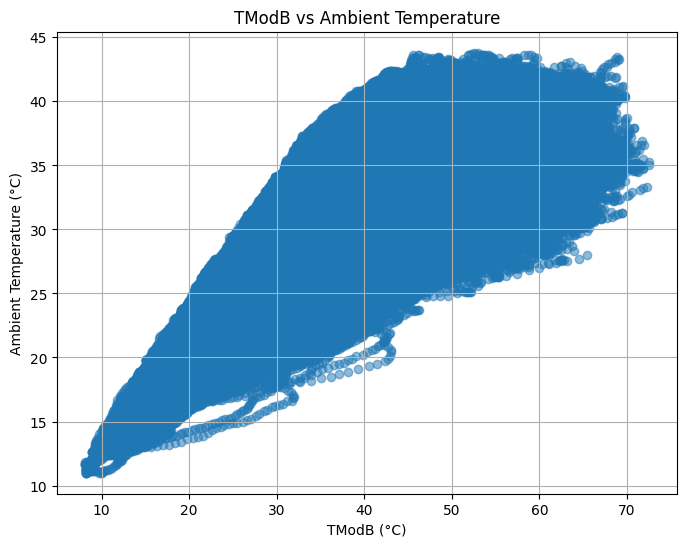

In [20]:
# Temperature analysis for module and ambient temperature columns using cleaned data
data_analyzer.temperature_analysis(temperature_cols, data=cleaned_data) 

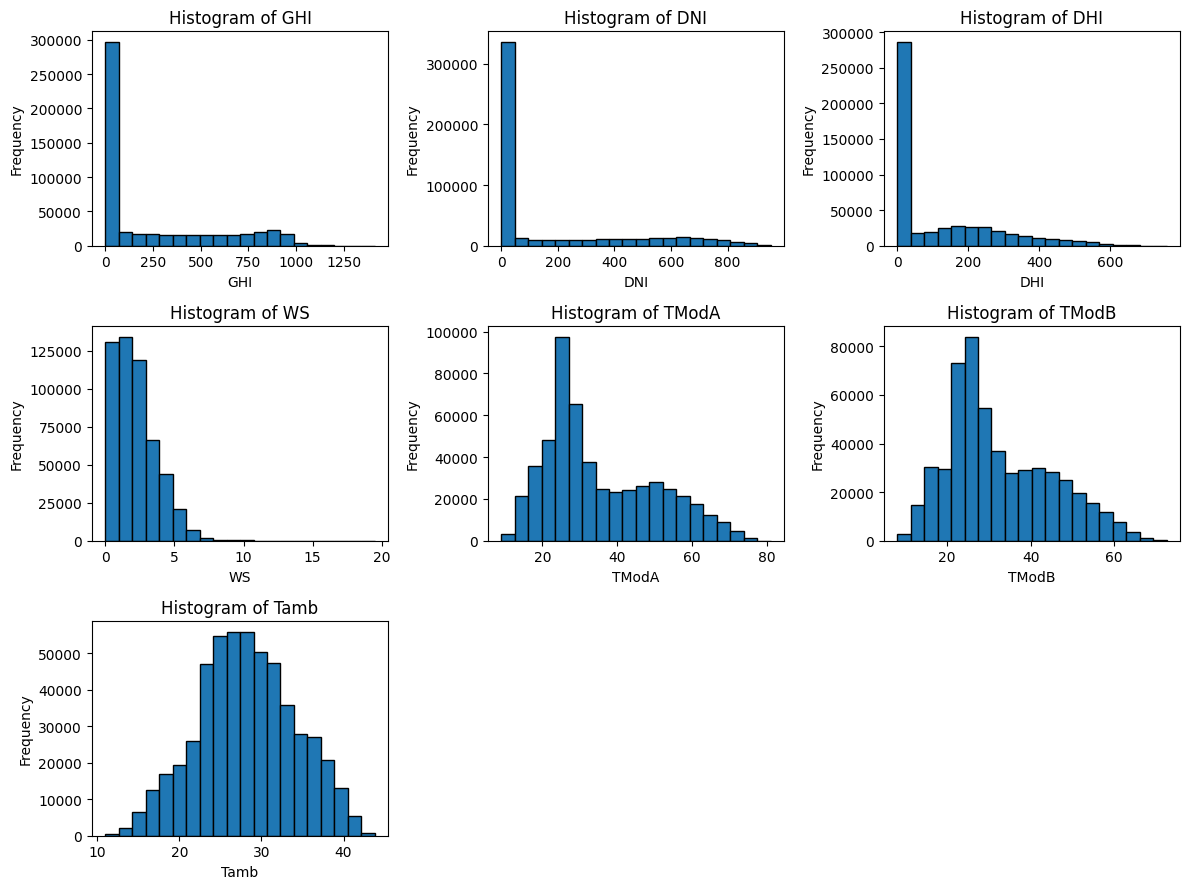

In [21]:
# Create histograms for GHI, DNI, DHI, TModA, WS with cleaned data
data_analyzer.histograms(['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb'], cleaned_data)

Box Plots for Solar Radiation:


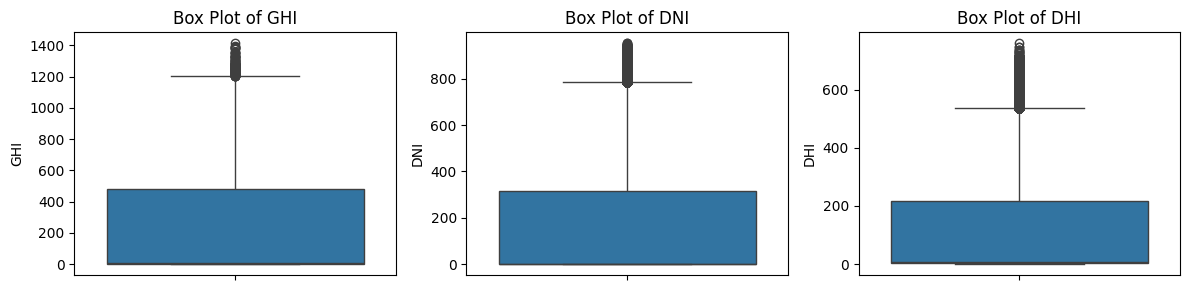

Box Plots for Temperature:


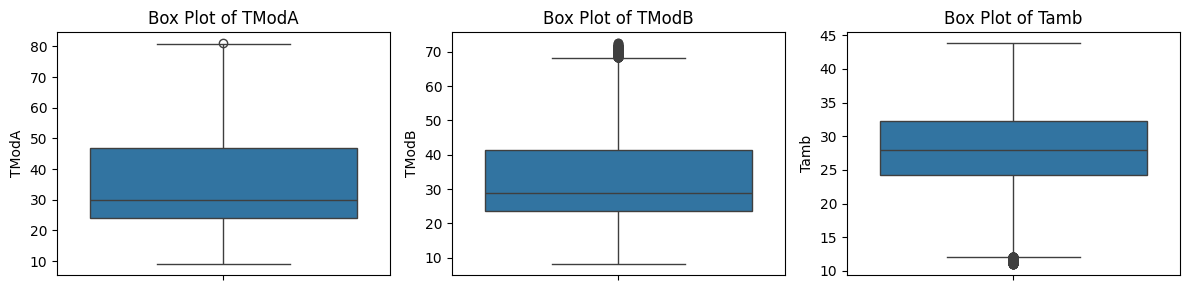

In [22]:
#Box Plots using cleaned data
# Define lists containing solar radiation and temperature columns

# Create box plots for solar radiation data
print("Box Plots for Solar Radiation:")
data_analyzer.box_plots(solar_radiation_cols, cleaned_data)

# Create box plots for temperature data
print("Box Plots for Temperature:")
data_analyzer.box_plots(temperature_cols, cleaned_data)

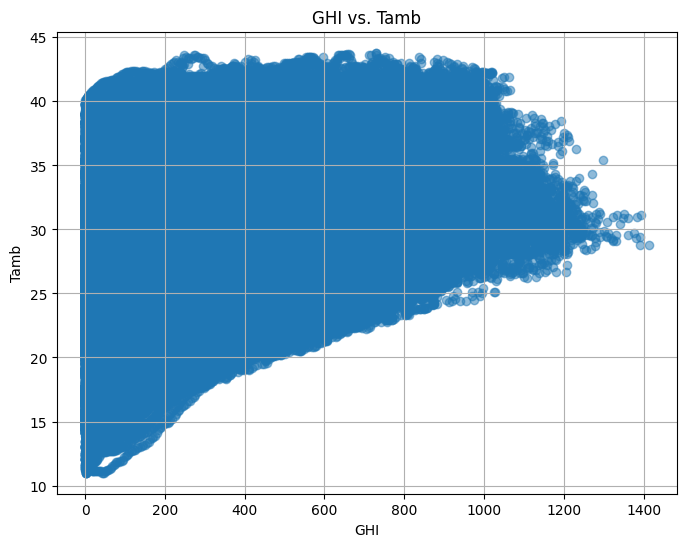

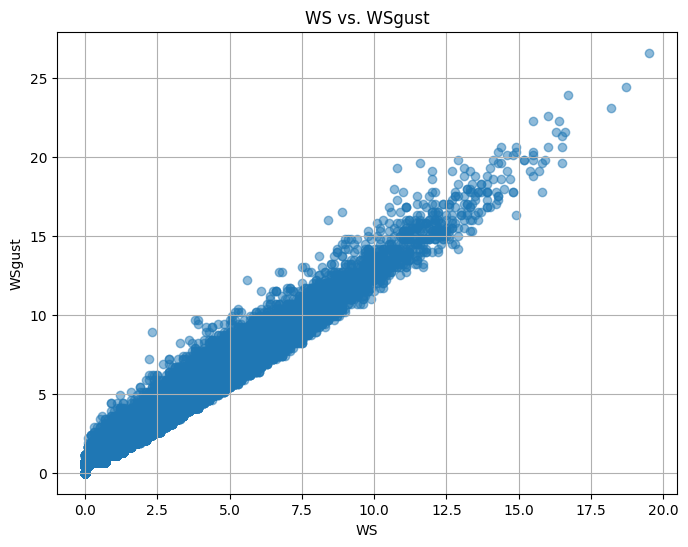

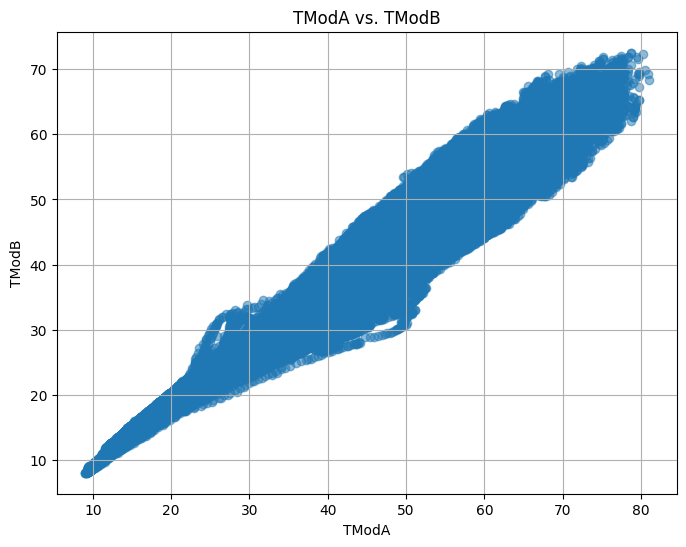

In [23]:
# Scatter plots with the cleaned data

# Create scatter plots for each pair of variables
for x_col, y_col in scatter_plot_pairs:
    data_analyzer.scatter_plot(x_col, y_col, cleaned_data)